In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [23]:
from tensorflow.keras import datasets, layers, models

In [6]:
# following command if getting SSL error while loading the dataset
#!open /Applications/Python\ 3.7/Install\ Certificates.command

In [5]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [15]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [17]:
train_images = train_images / 255.0

test_images = test_images / 255.0

Ankle boot


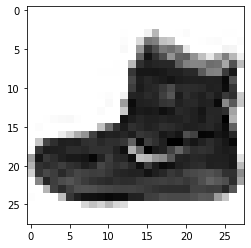

T-shirt/top


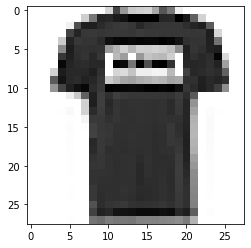

T-shirt/top


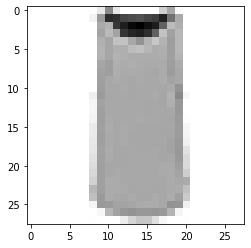

Dress


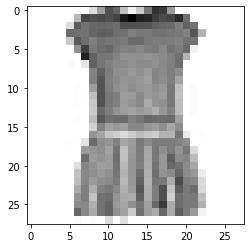

T-shirt/top


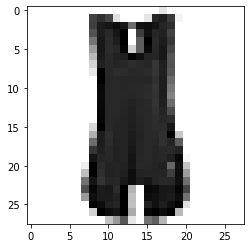

In [22]:
for x in range(5):
    print(class_names[train_labels[x]])
    plt.imshow(train_images[x],cmap=plt.cm.binary)
    plt.show()

In [29]:
model = models.Sequential()
model.add(layers.Conv1D(32,3, activation='relu', input_shape=(32, 3)))
model.add(layers.MaxPooling1D(2))
model.add(layers.Conv1D(64, 3, activation='relu'))
model.add(layers.MaxPooling1D(2))
model.add(layers.Conv1D(64, 3, activation='relu'))

In [31]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [32]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 30, 32)            320       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 15, 32)            0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 13, 64)            6208      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 6, 64)             0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 4, 64)             12352     
_________________________________________________________________
flatten (Flatten)            (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 64)               

In [33]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10


ValueError: in user code:

    /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:806 train_function  *
        return step_function(self, iterator)
    /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:789 run_step  **
        outputs = model.train_step(data)
    /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:747 train_step
        y_pred = self(x, training=True)
    /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/keras/engine/base_layer.py:976 __call__
        self.name)
    /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/keras/engine/input_spec.py:216 assert_input_compatibility
        ' but received input with shape ' + str(shape))

    ValueError: Input 0 of layer sequential_5 is incompatible with the layer: expected axis -1 of input shape to have value 3 but received input with shape [32, 28, 28]


In [39]:
model.input.shape

TensorShape([None, 32, 3])

In [80]:
import numpy as np
from keras.datasets import mnist
from keras.utils import to_categorical
from tcn import compiled_tcn
import tensorflow as tf

In [81]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [95]:
#reshaping the image

def reshape(data):
    a = np.zeros(shape=(data.shape[0],(data.shape[1]*data.shape[2])))
    print(a[0])
    print(a.shape)
    for each in range(len(data)):

        a[each] = data[each].flatten
    
    return a

    

In [126]:
temp_train = []
for each in train_images:
 
    temp_train.append(np.array([y for x in each for y in x]))
    
train_data = np.array(temp_train)

In [127]:
temp_test = []
for each in test_images:
 
    temp_test.append(np.array([y for x in each for y in x]))
    
test_data = np.array(temp_test)

In [138]:
train_data[0].shape

(784,)

In [139]:
model = compiled_tcn(return_sequences=False,
                         num_feat=1,
                         num_classes=10,
                         nb_filters=20,
                         kernel_size=6,
                         dilations=[2 ** i for i in range(9)],
                         nb_stacks=1,
                         max_len=train_data[0:1].shape[1],
                         use_skip_connections=True)

x.shape= (None, 20)
model.x = (None, 784, 1)
model.y = (None, 10)


In [140]:
print(f'x_train.shape = {train_images.shape}')
print(f'y_train.shape = {train_labels.shape}')
print(f'x_test.shape = {test_images.shape}')
print(f'y_test.shape = {test_labels.shape}')

x_train.shape = (60000, 28, 28)
y_train.shape = (60000,)
x_test.shape = (10000, 28, 28)
y_test.shape = (10000,)


In [141]:
model.summary()

Model: "functional_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 784, 1)]          0         
_________________________________________________________________
tcn (TCN)                    (None, 20)                41320     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                210       
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
Total params: 41,530
Trainable params: 41,530
Non-trainable params: 0
_________________________________________________________________


In [142]:
model.fit(train_data, train_labels, epochs=100,validation_data=(test_data, test_labels))

Epoch 1/100
 396/1875 [=====>........................] - ETA: 6:11 - loss: 89.6199 - accuracy: 0.5155

KeyboardInterrupt: 

In [159]:
tf.keras.models.load_model("./model/")

ValueError: Unsuccessful TensorSliceReader constructor: Failed to get matching files on ./model/variables/variables: Not found: ./model/variables; No such file or directory